In [1]:
# Stock data
import quandl
import datetime
# Analyzing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# stock_MSFT = quandl.get("WIKI/MSFT")
# stock_MSFT.to_csv('MSFT.csv')

In [3]:
stock_MSFT = pd.read_csv('MSFT.csv')
stock_MSFT.index = pd.to_datetime(stock_MSFT.Date)
stock_MSFT

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
1986-03-13,1986-03-13,25.500,29.250,25.50,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,1986-03-14,28.000,29.500,28.00,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,1986-03-17,29.000,29.750,29.00,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,1986-03-18,29.500,29.750,28.50,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,1986-03-19,28.750,29.000,28.00,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930000,94.050000,92.210000,92.480000,2.375326e+07
2018-03-22,2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265000,91.750000,89.660000,89.790000,3.757817e+07
2018-03-23,2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500000,90.460000,87.080000,87.180000,4.215940e+07


In [4]:
scaler = preprocessing.MinMaxScaler()
stock_MSFT['Close_norm'] = scaler.fit_transform(np.array(stock_MSFT['Close']).reshape(-1, 1))

In [5]:
stock_MSFT_Close = pd.DataFrame(stock_MSFT['Close_norm'])

In [6]:
Next_N_day = 30
GT = stock_MSFT_Close.iloc[Next_N_day :]

In [7]:
stock_MSFT = stock_MSFT_Close.iloc[:-Next_N_day]
stock_MSFT = stock_MSFT.assign(GT=GT.values)

stock_MSFT

,Close_norm,GT
Date,,
1986-03-13,0.077978,0.112871
1986-03-14,0.084046,0.114388
1986-03-17,0.087081,0.108320
1986-03-18,0.082529,0.103768
1986-03-19,0.079495,0.100734
...,...,...
2018-02-06,0.462285,0.469264
2018-02-07,0.451848,0.452940
2018-02-08,0.423205,0.437102


In [8]:
train_valid_set = stock_MSFT.iloc[:-60]
test_set = stock_MSFT.iloc[-60:]

In [9]:
X_test = np.array(test_set.Close_norm).reshape(-1,1)
y_test = np.array(test_set.GT)

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    np.array(train_valid_set.Close_norm).reshape(-1,1),
    np.array(train_valid_set.GT),
    test_size=0.33, random_state=42)

Text(0.5, 1.0, 'Train dataset')

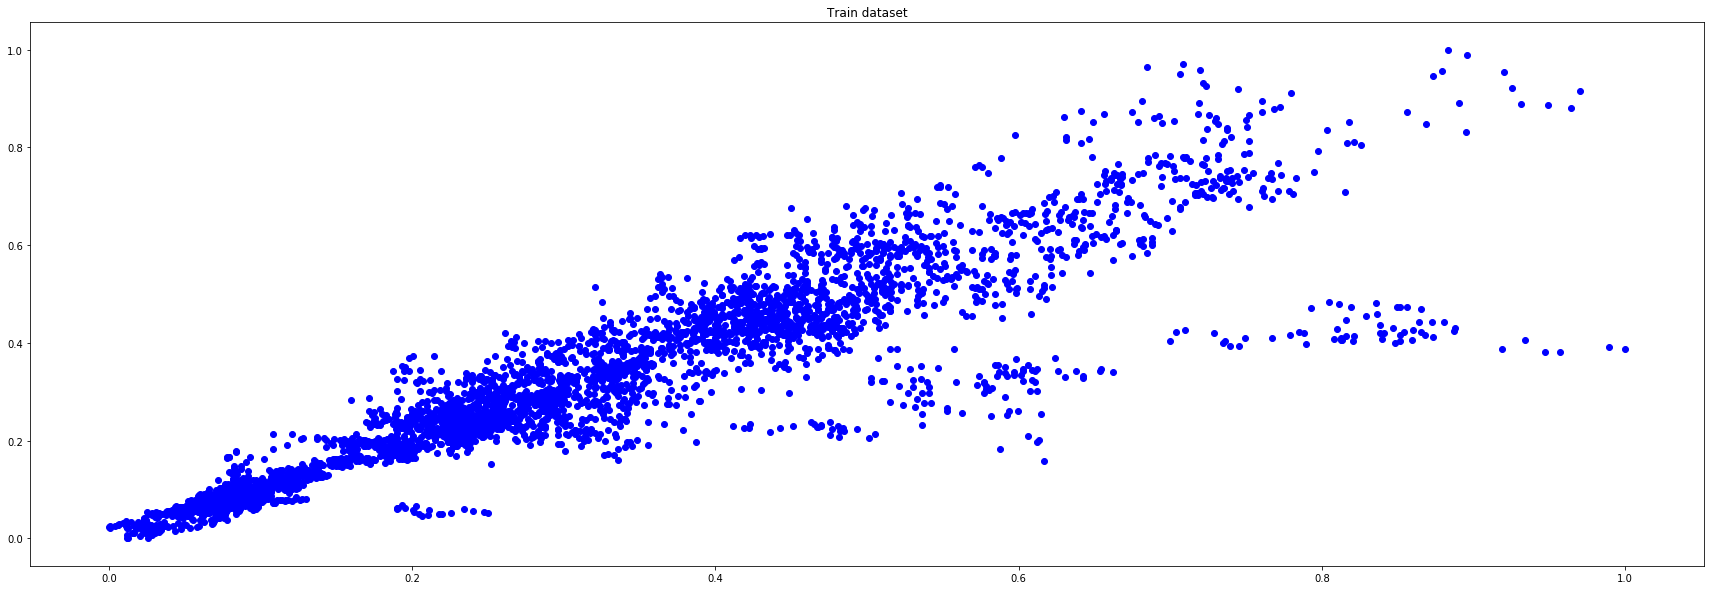

In [10]:
# ตั้งค่าขนาดพื้นที่ภาพ
plt.figure(figsize=(30,10))

# scatter plot ความสัมพันธ์ของค่า X_train, y_train 
plt.scatter(X_train, y_train, marker='o', color='blue')
plt.title('Train dataset')

Text(0.5, 1.0, 'Test dataset')

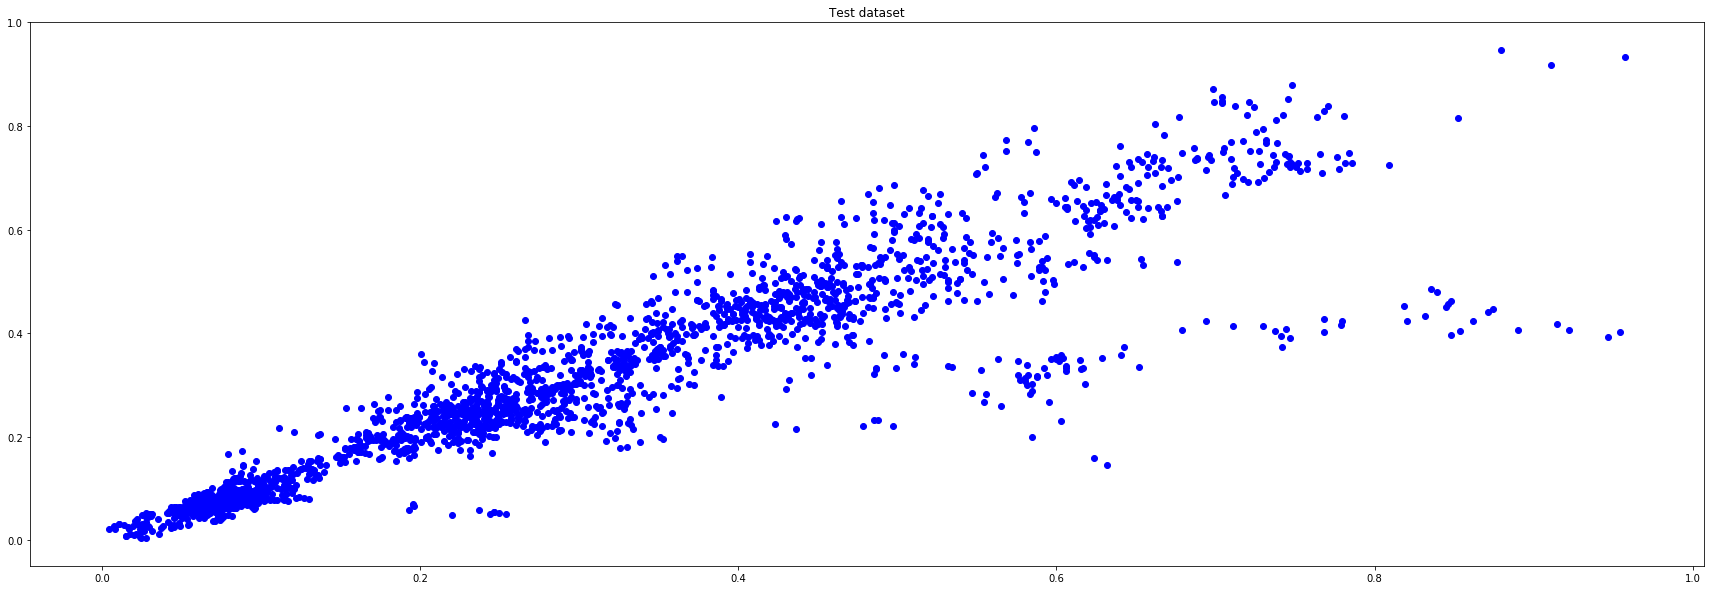

In [11]:
plt.figure(figsize=(30,10))

# scatter plot ความสัมพันธ์ของค่า X_test, y_test
plt.scatter(X_valid, y_valid, marker='o', color='blue')
plt.title('Test dataset')

In [12]:
# สร้างโมเดลรูปแบบ cross validation ที่ต้องการใช้ ในที่นี้ใช้ K-Fold โดยใช้ฟังก์ชัน
kf = model_selection.KFold(n_splits=5, random_state=2011, shuffle=True)

# สร้าง prediction model พร้อมระบุพารามิเตอร์ที่ต้องการ
# Linear Regression Model
LRM = LinearRegression()

# Support Vector Regression (SVR) Model จำนวน 3 รูปแบบ kernel
c_val = 1000                    # ค่าปรับเข้มงวดกับ outlier bound [10^-6, 10^6] ค่าที่น่าสนใจ 1000
gramma_value = 0.1              # ค่าการควบคุมรูปร่างของโมเดล [10^-6, 10^6] ค่าน่าสนใจ 0.1
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=gramma_value)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

# ทำ cross validation สำหรับแต่ละโมเดล model_name
LRM_cross = model_selection.cross_val_score(LRM, X_train, y_train, cv=kf)
print('LRM ', LRM_cross)
svr_lin_cross = model_selection.cross_val_score(svr_lin, X_train, y_train, cv=kf)
print('svr_lin_cross ', svr_lin_cross)
svr_rbf_cross = model_selection.cross_val_score(svr_rbf, X_train, y_train, cv=kf)
print('svr_rbf_cross ', svr_rbf_cross)
# svr_poly_cross = model_selection.cross_val_score(svr_poly, X_train, y_train, cv=kf)
# print('svr_poly_cross ', svr_poly_cross)

LRM  [0.83583056 0.86176357 0.86891686 0.85640335 0.87430537]
svr_lin_cross  [0.81784059 0.83316476 0.85065123 0.83509001 0.84297472]
svr_rbf_cross  [0.8591354  0.8783844  0.8813018  0.87665745 0.8764443 ]


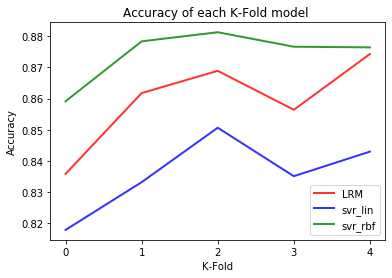

In [13]:
# แสดงรูปกราฟเปรียบเทียบ score ที่ได้จากโมเดลทั้ง 4 แบบที่คำนวณข้างบน

from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(np.arange(len(LRM_cross)), LRM_cross, color='red', alpha=0.8, lw=2)
ax.plot(np.arange(len(svr_lin_cross)), svr_lin_cross, color='blue', alpha=0.8, lw=2)
ax.plot(np.arange(len(svr_rbf_cross)), svr_rbf_cross, color='green', alpha=0.8, lw=2)

ax.legend(['LRM', 'svr_lin', 'svr_rbf', 'svr_poly'])
ax.set_xlabel('K-Fold')
ax.set_ylabel('Accuracy')
plt.title('Accuracy of each K-Fold model ')
plt.show()

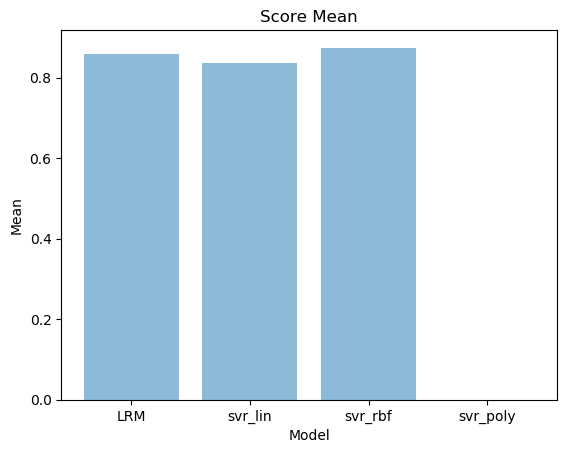

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly')
y_pos = np.arange(len(objects))
performance = [LRM_cross.mean(), svr_lin_cross.mean(), svr_rbf_cross.mean(), 0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Model')
plt.title('Score Mean')

plt.show()

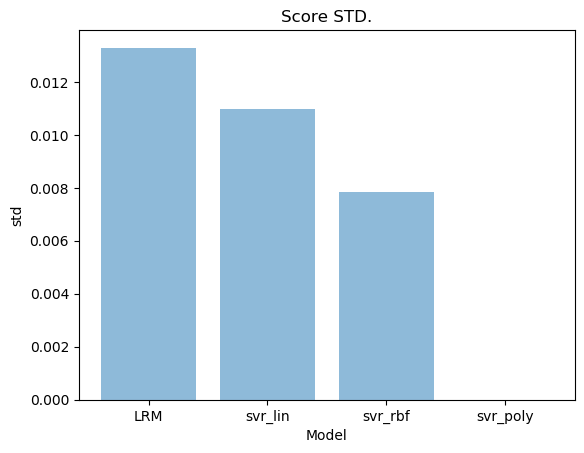

In [15]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly')
y_pos = np.arange(len(objects))
performance = [LRM_cross.std(), svr_lin_cross.std(), svr_rbf_cross.std(), 0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('std')
plt.xlabel('Model')
plt.title('Score STD.')

plt.show()

In [16]:
LRM.fit(X_train, y_train)
LRM_pred_valid = LRM.predict(X_valid)
LRM_pred_test  = LRM.predict(X_test)

svr_lin.fit(X_train, y_train)
svr_lin_pred_valid = svr_lin.predict(X_valid)
svr_lin_pred_test = svr_lin.predict(X_test)

svr_rbf.fit(X_train, y_train)
svr_rbf_pred_valid = svr_rbf.predict(X_valid)
svr_rbf_pred_test = svr_rbf.predict(X_test)

# svr_poly.fit(X_trian, y_train)
# svr_poly_pred_valid = svr_poly.predict(X_valid)
# svr_poly_pred_test = svr_poly.predict(X_test)

In [17]:
def perfomance_measure(model_name, model_pred_valid, model_pred_test) :
    msr_valid = metrics.mean_squared_error(y_valid, model_pred_valid)
    msr_test = metrics.mean_squared_error(y_test, model_pred_test)
    r2_valid = metrics.r2_score(y_valid, model_pred_valid)
    r2_test = metrics.r2_score(y_test, model_pred_test)
    
    print('============ ',model_name, ' ============')
    print('Mean Squared Error validation set:', msr_valid)
    print('Mean Squared Error test set:', msr_test)
    print('R2 validation set: ', r2_valid)
    print('R2 test set: ', r2_test)
#     print('\n')
    
    return msr_valid, msr_test, r2_valid, r2_test

LRM_msr_valid, LRM_msr_test, LRM_r2_valid, LRM_r2_test = perfomance_measure('LRM', LRM_pred_valid, LRM_pred_test)
svr_lin_msr_valid, svr_lin_msr_test, svr_lin_r2_valid, svr_lin_r2_test = perfomance_measure('svr_lin', svr_lin_pred_valid, svr_lin_pred_test)
svr_rbf_msr_valid, svr_rbf_msr_test, svr_rbf_r2_valid, svr_rbf_r2_test = perfomance_measure('svr_rbf', svr_rbf_pred_valid, svr_rbf_pred_test)
# svr_poly_msr_valid, svr_poly_msr_test, svr_poly_r2_valid, svr_poly_r2_test = perfomance_measure('svr_poly', svr_poly_pred_valid, svr_poly_pred_test)

============  LRM  ============
Mean Squared Error validation set: 0.005457782100008106
Mean Squared Error test set: 0.0015857296063579013
R2 validation set:  0.8614391723872385
R2 test set:  -4.367101137413497
============  svr_lin  ============
Mean Squared Error validation set: 0.006426013806388699
Mean Squared Error test set: 0.0008339552066940502
R2 validation set:  0.8368579443171746
R2 test set:  -1.8226262033915281
============  svr_rbf  ============
Mean Squared Error validation set: 0.004738532242359212
Mean Squared Error test set: 0.00034344814416744924
R2 validation set:  0.8796993106100605
R2 test set:  -0.16244340637456167


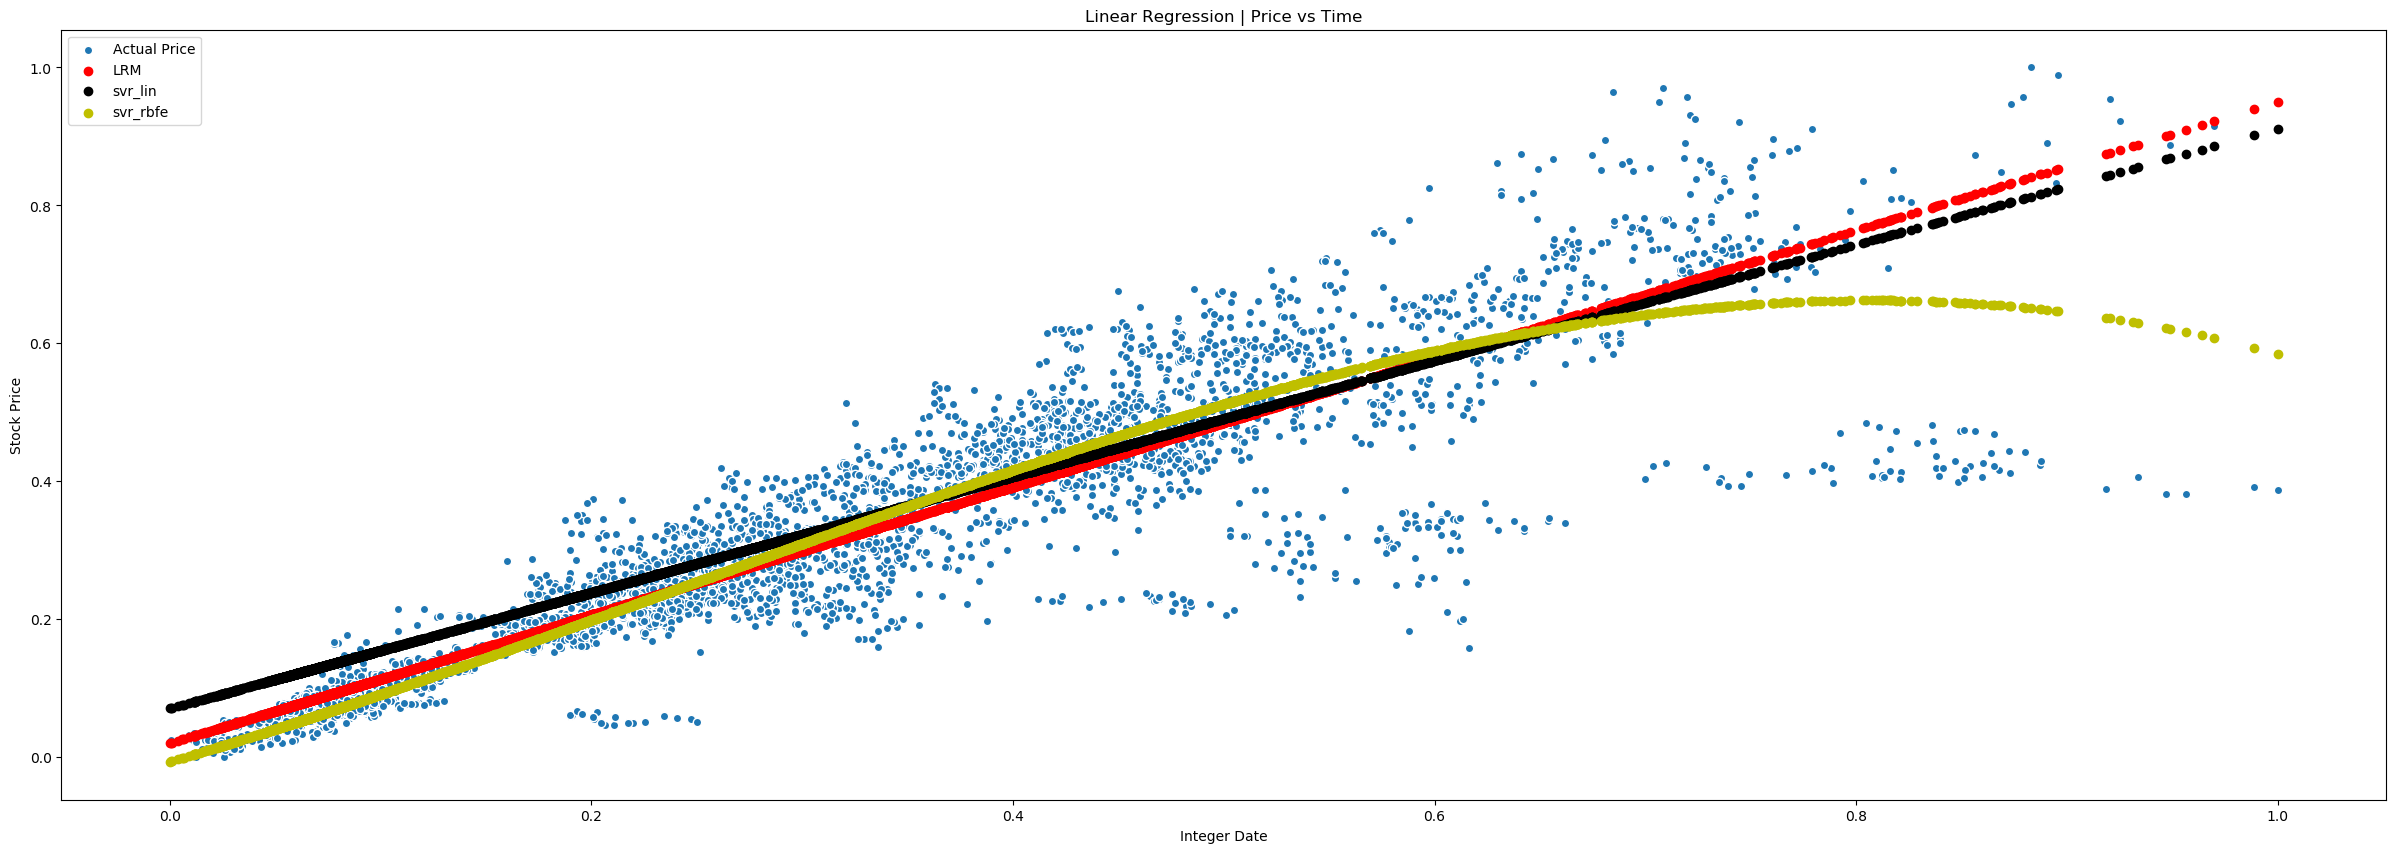

In [27]:
# Train set graph
plt.figure(1, figsize=(30,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.scatter(X_train, LRM.predict(X_train), color='r', label='LRM')
plt.scatter(X_train, svr_lin.predict(X_train), color='k', label='svr_lin')
plt.scatter(X_train, svr_rbf.predict(X_train), color='y', label='svr_rbfe')
# plt.plot(X_train, svr_poly.predict(X_train), color='m', label='svr_poly')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

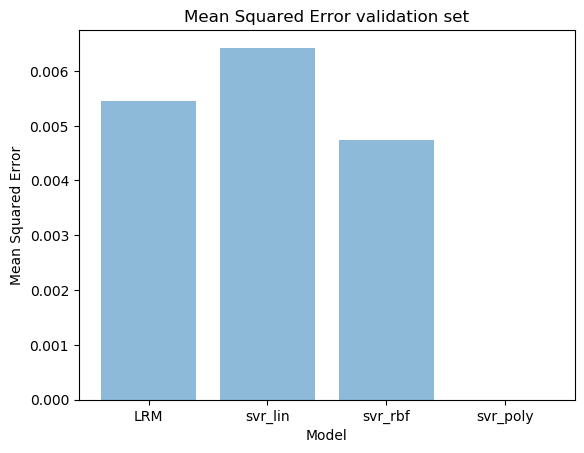

In [19]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly')
y_pos = np.arange(len(objects))
performance = [LRM_msr_valid, svr_lin_msr_valid, svr_rbf_msr_valid, 0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('Mean Squared Error validation set')

plt.show()

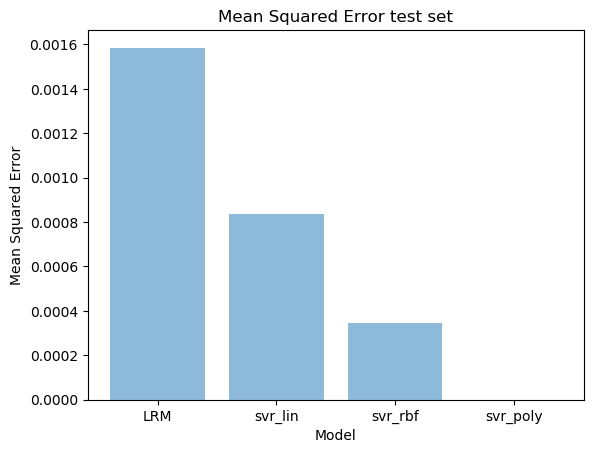

In [20]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly')
y_pos = np.arange(len(objects))
performance = [LRM_msr_test, svr_lin_msr_test, svr_rbf_msr_test, 0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('Mean Squared Error test set')

plt.show()

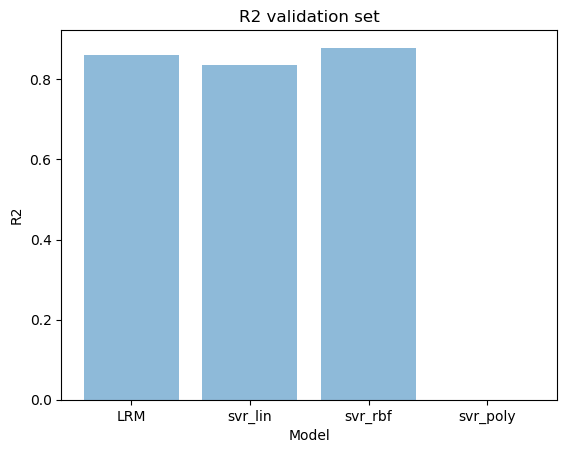

In [21]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly')
y_pos = np.arange(len(objects))
performance = [LRM_r2_valid, svr_lin_r2_valid, svr_rbf_r2_valid, 0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2')
plt.xlabel('Model')
plt.title('R2 validation set')

plt.show()

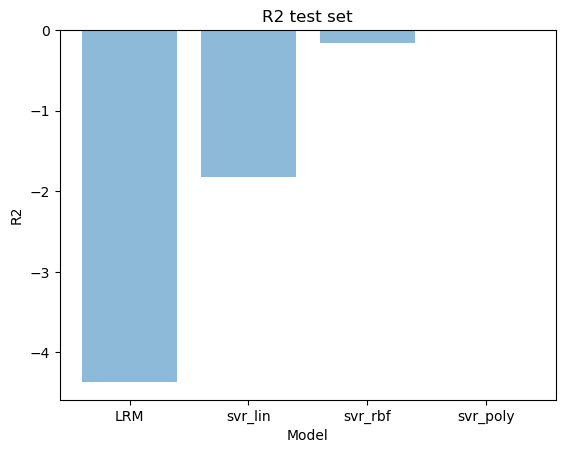

In [22]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly')
y_pos = np.arange(len(objects))
performance = [LRM_r2_test, svr_lin_r2_test, svr_rbf_r2_test, 0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2')
plt.xlabel('Model')
plt.title('R2 test set')

plt.show()

In [53]:
svc_kernel= ['rbf', 'linear']
k_Fold = 3 #เลือก 1 ค่า
c_param = [9, 10 ,11 ,12] # เลือกค่าในช่วง [0.1, 1000] จำนวน 4 ค่า
gamma = [0.5, 0.6, 0.7] # เลือกค่าในช่วง [0.1, 1.0] จำนวน 3 ค่า
tuned_parameters = [{'kernel': svc_kernel, 'C': c_param, 'gamma': gamma}]

In [54]:
model = SVR()
search = model_selection.GridSearchCV(model, param_grid=tuned_parameters).fit(X_train, y_train)

In [55]:
search.cv_results_

{'mean_fit_time': array([0.09574614, 0.09155602, 0.093751  , 0.09693646, 0.09653983,
        0.09674463, 0.1308475 , 0.13204045, 0.12047849, 0.11988463,
        0.11309495, 0.11011505, 0.09673381, 0.13164811, 0.12805705,
        0.11589513, 0.12167039, 0.14206338, 0.11270957, 0.13525238,
        0.13104925, 0.1234623 , 0.1215569 , 0.10959959]),
 'std_fit_time': array([0.01010156, 0.0036416 , 0.01080058, 0.00509439, 0.01136678,
        0.00594952, 0.02450001, 0.01669961, 0.01054404, 0.01198477,
        0.01529908, 0.01092529, 0.0060758 , 0.02336261, 0.01688259,
        0.01024698, 0.01442121, 0.02909843, 0.00407819, 0.01432803,
        0.00915796, 0.01704908, 0.00809246, 0.0064551 ]),
 'mean_score_time': array([0.00658722, 0.00199265, 0.0067862 , 0.0023983 , 0.00698328,
        0.00258846, 0.00817933, 0.00299301, 0.00857606, 0.00299373,
        0.00817842, 0.00258379, 0.00757961, 0.00280347, 0.00937023,
        0.00299039, 0.0083776 , 0.0037889 , 0.00828567, 0.00259166,
        0.013959

In [56]:
res_df = pd.DataFrame(search.cv_results_)
res_df.to_csv (r'cv_results.csv', index = False, header=True)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095746,0.010102,0.006587,0.000488,9,0.5,rbf,"{'C': 9, 'gamma': 0.5, 'kernel': 'rbf'}",0.891532,0.880220,0.865815,0.875681,0.863434,0.875337,0.010184,6
1,0.091556,0.003642,0.001993,0.000004,9,0.5,linear,"{'C': 9, 'gamma': 0.5, 'kernel': 'linear'}",0.845235,0.841580,0.829251,0.829036,0.828268,0.834674,0.007231,16
2,0.093751,0.010801,0.006786,0.000403,9,0.6,rbf,"{'C': 9, 'gamma': 0.6, 'kernel': 'rbf'}",0.890470,0.880012,0.864654,0.878418,0.865006,0.875712,0.009803,1
3,0.096936,0.005094,0.002398,0.000483,9,0.6,linear,"{'C': 9, 'gamma': 0.6, 'kernel': 'linear'}",0.845235,0.841580,0.829251,0.829036,0.828268,0.834674,0.007231,16
4,0.096540,0.011367,0.006983,0.000638,9,0.7,rbf,"{'C': 9, 'gamma': 0.7, 'kernel': 'rbf'}",0.874707,0.872690,0.858643,0.873986,0.863725,0.868750,0.006416,9
5,0.096745,0.005950,0.002588,0.000488,9,0.7,linear,"{'C': 9, 'gamma': 0.7, 'kernel': 'linear'}",0.845235,0.841580,0.829251,0.829036,0.828268,0.834674,0.007231,16
6,0.130848,0.024500,0.008179,0.001933,10,0.5,rbf,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.891716,0.880028,0.865522,0.875919,0.863590,0.875355,0.010246,5
7,0.132040,0.016700,0.002993,0.000631,10,0.5,linear,"{'C': 10, 'gamma': 0.5, 'kernel': 'linear'}",0.845235,0.841579,0.829589,0.829129,0.828268,0.834760,0.007167,13
8,0.120478,0.010544,0.008576,0.000491,10,0.6,rbf,"{'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}",0.889928,0.879428,0.864683,0.878555,0.865227,0.875564,0.009544,4
9,0.119885,0.011985,0.002994,0.000016,10,0.6,linear,"{'C': 10, 'gamma': 0.6, 'kernel': 'linear'}",0.845235,0.841579,0.829589,0.829129,0.828268,0.834760,0.007167,13


In [57]:
print('best parameter:', search.best_params_)
print('best score: ',search.best_score_)

best parameter: {'C': 9, 'gamma': 0.6, 'kernel': 'rbf'}
best score:  0.8757119091282398


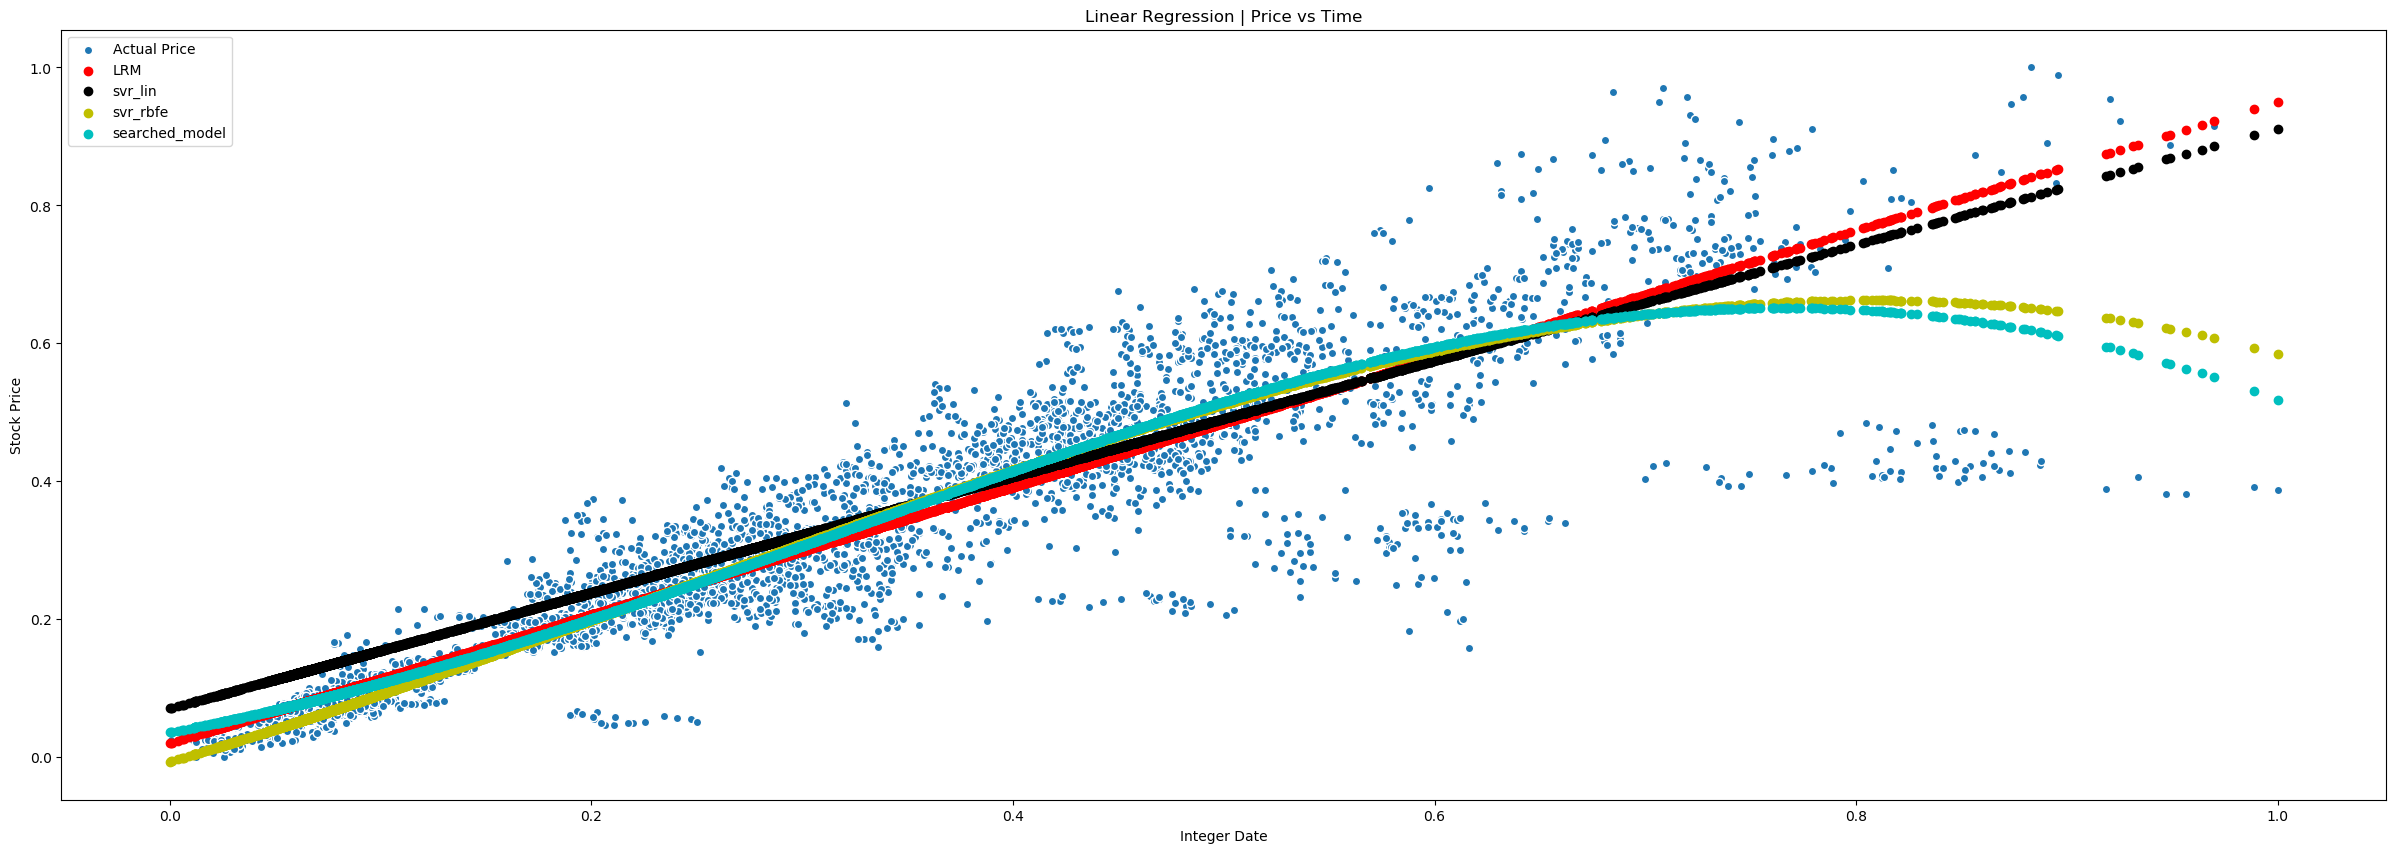

In [67]:
# Train set graph
plt.figure(1, figsize=(30,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.scatter(X_train, LRM.predict(X_train), color='r', label='LRM')
plt.scatter(X_train, svr_lin.predict(X_train), color='k', label='svr_lin')
plt.scatter(X_train, svr_rbf.predict(X_train), color='y', label='svr_rbfe')
# plt.plot(X_train, svr_poly.predict(X_train), color='m', label='svr_poly')
plt.scatter(X_train, search.predict(X_train), color='c', label='searched_model')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [65]:
searched_model_valid = search.predict(X_valid)
searched_model_test = search.predict(X_test)

searched_model_msr_valid, searched_model_msr_test, searched_model_r2_valid, searched_model_r2_test = perfomance_measure('Searched model', best_model_valid, best_model_test)

============  Searched model  ============
Mean Squared Error validation set: 0.00471352626841785
Mean Squared Error test set: 0.0003332785167439202
R2 validation set:  0.8803341561170978
R2 test set:  -0.12802302430371393


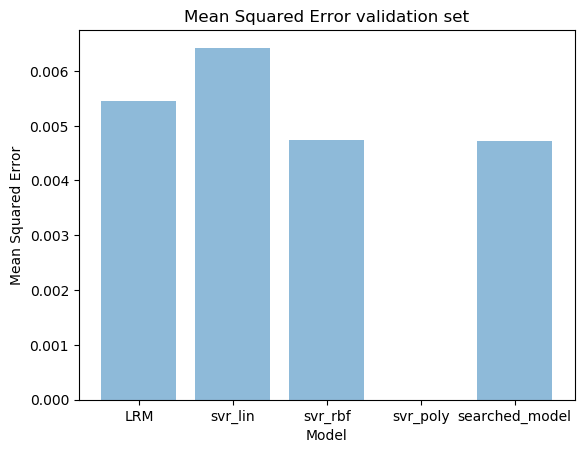

In [59]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly', 'searched_model')
y_pos = np.arange(len(objects))
performance = [LRM_msr_valid, svr_lin_msr_valid, svr_rbf_msr_valid, 0, searched_model_msr_valid]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('Mean Squared Error validation set')

plt.show()

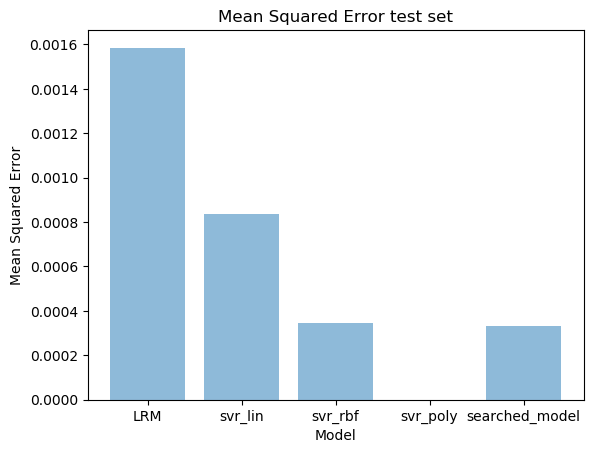

In [60]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly', 'searched_model')
y_pos = np.arange(len(objects))
performance = [LRM_msr_test, svr_lin_msr_test, svr_rbf_msr_test, 0, searched_model_msr_test]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.title('Mean Squared Error test set')

plt.show()

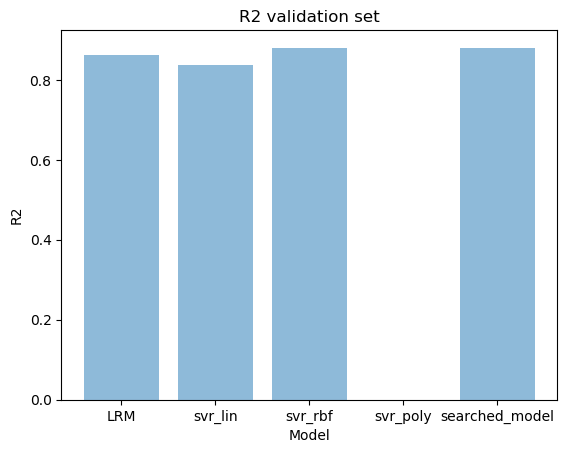

In [61]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly', 'searched_model')
y_pos = np.arange(len(objects))
performance = [LRM_r2_valid, svr_lin_r2_valid, svr_rbf_r2_valid, 0, searched_model_r2_valid]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2')
plt.xlabel('Model')
plt.title('R2 validation set')

plt.show()

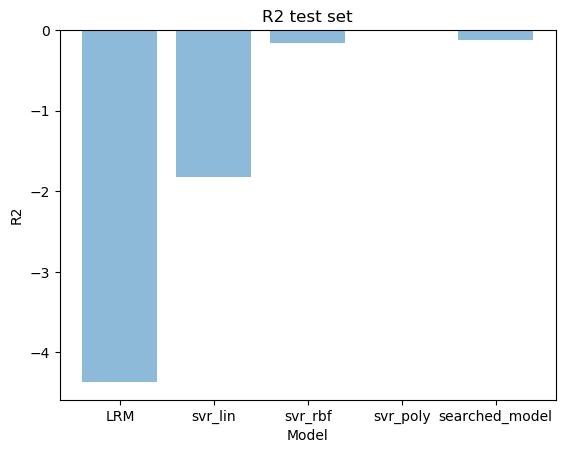

In [62]:
objects = ('LRM', 'svr_lin', 'svr_rbf', 'svr_poly', 'searched_model')
y_pos = np.arange(len(objects))
performance = [LRM_r2_test, svr_lin_r2_test, svr_rbf_r2_test, 0, searched_model_r2_test]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2')
plt.xlabel('Model')
plt.title('R2 test set')

plt.show()

In [66]:
#============  Searched model  ============
# Mean Squared Error validation set: 0.00471352626841785
# Mean Squared Error test set: 0.0003332785167439202
# R2 validation set:  0.8803341561170978
# R2 test set:  -0.12802302430371393

# ============  svr_rbf  ============
# Mean Squared Error validation set: 0.004738532242359212
# Mean Squared Error test set: 0.00034344814416744924
# R2 validation set:  0.8796993106100605
# R2 test set:  -0.16244340637456167